## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib

1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [2]:
# 전체 데이터 앞 7개

data = pd.read_csv('diabetes.csv')
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [3]:
# 타겟 변수('Outcome')에 속한 값들의 비율

data['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [5]:
X = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1].to_numpy().reshape(-1, 1).ravel()
print(X.shape)
print(y.shape)

(768, 8)
(768,)


1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.3, random_state=123, stratify=y)

1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

Answer: 훈련 데이터의 비율이 일반적으로 테스트 데이터의 비율보다 높다. 이는 모델을 잘 훈련시키기 위함이다. 하지만 훈련 데이터의 비율을 너무 많은 비율로 하는 경우 과대적합이 발생할 수 있다. 일반적으로 훈련 데이터와 테스트 데이터의 비율을 7:3으로 한다.

1.7 startify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

Answer: stratify 를 설정하는 이유는 데이터를 훈련 데이터와 테스트 데이터로 나눌 때 클래스 분포 비율에 맞춰 나누도록 하기위함이다.
위 데이터의 타겟 변수의 비율의 차이가 많이 나는 경우에 stratify를 적용하여 나눠진 데이터들이 기존 데이터를 잘 설명하게 해준다.

### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [8]:
def clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    #accuracy, precision, recall, f1, roc_auc(roc_auc_score의 경우 y_test와 pred_proba로 측정)는 직접 작성
    
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬,\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

2. 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

Answer: 이분형 예측 통계(머신러닝) 모델의 예측 성능을 측정하는 지표로 2행 2열의 행렬표이다. 관심범주가 A일 때, TP는 관심 범주를 정확하게 분류한 데이터의 수, TN는 관심 범주가 아닌 것을 정확하게 분류한 데이터 수, FP는 관심 범주로 잘못 분류한 데이터 수, FN는 관심 범주가 아닌 것으로 잘못 분류한 데이터 수를 의미한다. TP, TN의 숫자가 많을 수록 좋은 모델이라고 할 수 있다.

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [9]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [10]:
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [11]:
print(pred.shape)
print(pred_proba.shape)

(231,)
(231,)


In [12]:
from sklearn.metrics import confusion_matrix

clf_eval(y_test, pred=pred, pred_proba=pred_proba)

오차 행렬,
 [[134  16]
 [ 39  42]]
정확도: 0.7619, 정밀도: 0.7241, 재현율: 0.518519, F1: 0.6043, AUC:0.8435


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

Answer: solver 파라미터의 역할은 비용함수의 최솟값을 어떤 방법으로 찾을 것인지를 지정하는 역할을 한다. solver 파라미터에는 newton_cg, liblinear, sag, saga로 5개가 있다.

1. newton_cg: 뉴튼-랩슨 방법은 경사하강법과 마찬가지로 여러 번의 업데이트를 통해서 비용함수를 최소화하는 파라미터의 값을 찾는 방법이다. 2차 도함수를 계산해야 하는 단점이 있고 규제 방법에는 l2와 none이 있다.

2. lbfgs: Limited-memory Broyden-Fletcher-Goldfarb-Shnno의 약자로 뉴튼-랩슨 방법을 약간 변형한 방법이다. 차이점은 2차 도함수를 정확하게 계산하는 것이 아니라 근사치를 사용한다는 점이다. 규제 방법에는 l2와 none이 있다.

3. liblinear: 경사하강법과 비슷한 방법이지만 liblinear은 한 번에 하나의 파라미터만 업데이트한다는 차이가 있다. 규제 방법에는 l1과 l2가 있다.

4. sag: Stochastic Average Gradient descent의 약자로 경사하강법과 유사하게 작동하지만, 차이점은 이전 업데이트 단계에서의 경사값을 현재 업데이트에 사용한다는 점이다. 학습속도가 더 빨리지는 장점이 있다.규제 방법에는 l2와 none이 있다.

5. saga: l1, l2, elasticnet, none까지 모두 사용가능하게 지원되는 경사 하강법을 변형한 최적화 방법이다.

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

Answer: pred는 데이터의 예측값을 의미하고 pred_proba는 데이터의 예측값에 대한 예측 확률을 의미한다.

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

In [14]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #X축, y축 label과 legend, grid 설정
    ### 직접 작성(xlabel - 'Threshold value', ylabel = 'Precision and Recall value'), legend, grid는 default값으로
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

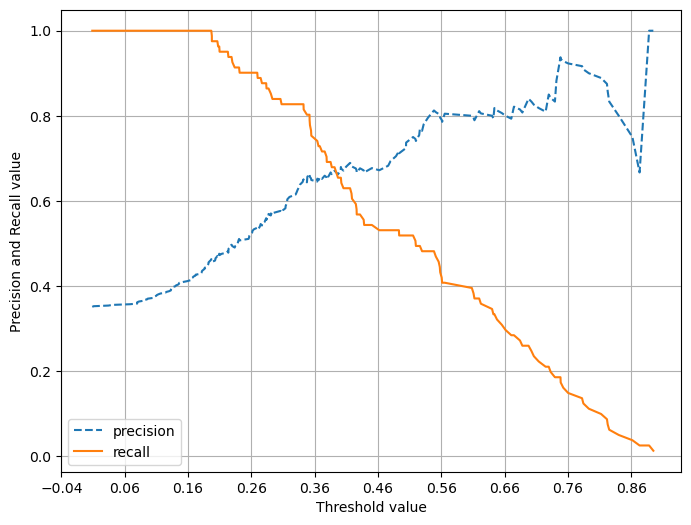

In [15]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [16]:
X = data.iloc[:, :-1]
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [26]:
### Glucose, BloodPressure, SkinThickness, Insulin, BMI에 대해 평균값으로 대체
feature_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in feature_list:
    X.replace({feature: 0}, X[feature].mean(), inplace=True)

X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

Answer: feature scaling이란 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업으로 머신러닝 모델이 특정 데이터의 편향성을 갖는 걸 방지하기 위해 사용한다.

1. 표준화(Standardization): 서로 다른 범위의 변수들을 평균이 0이고 분산이 1인 정규분포를 가진 값으로 변환하는 작업이다.

2. 정규화(Normalization): 서로 다른 범위의 변수들의 크기를 통일하기 위해 이를 변환하는 작업으로 일반적으로 [0,1] 범위의 분포로 조정한다.

- StandardScaler: 사이킷런에서 제공하는 표준화를 위한 클래스이며, 개별 변수를 평균이 0이고 분산이 1인 정규분포를 가질 수 있도록 값을 변환해준다.

- MinMaxScaler: 사이킷런에서 제공하는 정규화를 위한 클래스이며,데이터 값을 0과 1 사이의 범위 값으로 변환한다. 음수 값이 있으면 -1에서 1 사이의 범위 값으로 변환한다.

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [19]:
from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(
X_scaled, y, test_size = 0.3, random_state=123, stratify=y)

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [20]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_scaled_train, y_train)

LogisticRegression(solver='liblinear')

In [21]:
pred = lr_clf.predict(X_scaled_test)
pred_proba = lr_clf.predict_proba(X_scaled_test)[:,1]

In [22]:
clf_eval(y_test, pred=pred, pred_proba=pred_proba)

오차 행렬,
 [[130  20]
 [ 41  40]]
정확도: 0.7359, 정밀도: 0.6667, 재현율: 0.493827, F1: 0.5674, AUC:0.8505


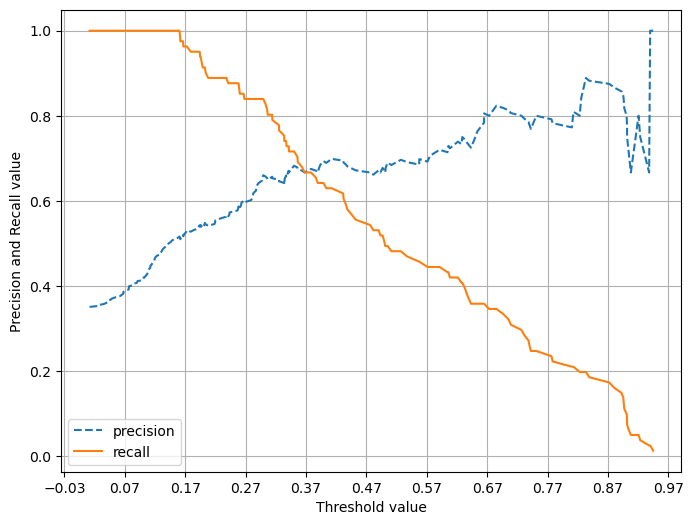

In [23]:
pred_proba_c1 = lr_clf.predict_proba(X_scaled_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

In [54]:
lr_model = LogisticRegression(max_iter=10000)

from sklearn.model_selection import GridSearchCV
LR_params = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'solver' : ['saga', 'liblinear']
}

grid_search = GridSearchCV(lr_model, param_grid=LR_params, cv=5)

grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear']})

In [55]:
#최적 파라미터 값 출력
grid_search.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [56]:
# 최적 파라미터로 다시 학습
best_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
best_model.fit(X_scaled_train, y_train)
y_preds = best_model.predict(X_scaled_test)

accuracy_score(y_test, y_preds)

0.7445887445887446

In [57]:
prob = best_model.predict_proba(X_scaled_test)
prob

array([[0.76395502, 0.23604498],
       [0.93885124, 0.06114876],
       [0.91004735, 0.08995265],
       [0.78125914, 0.21874086],
       [0.41136178, 0.58863822],
       [0.84530471, 0.15469529],
       [0.8180009 , 0.1819991 ],
       [0.91846642, 0.08153358],
       [0.84840215, 0.15159785],
       [0.54753102, 0.45246898],
       [0.62731667, 0.37268333],
       [0.81406403, 0.18593597],
       [0.61680385, 0.38319615],
       [0.80948707, 0.19051293],
       [0.13453608, 0.86546392],
       [0.24822823, 0.75177177],
       [0.69211392, 0.30788608],
       [0.81642791, 0.18357209],
       [0.64593903, 0.35406097],
       [0.79294256, 0.20705744],
       [0.35560367, 0.64439633],
       [0.72581144, 0.27418856],
       [0.0982906 , 0.9017094 ],
       [0.75283003, 0.24716997],
       [0.68736976, 0.31263024],
       [0.17952652, 0.82047348],
       [0.8911368 , 0.1088632 ],
       [0.84606075, 0.15393925],
       [0.67958078, 0.32041922],
       [0.22910188, 0.77089812],
       [0.

In [59]:
# cutoff 라인 변경해보기..

prob1 = best_model.predict_proba(X_scaled_test)[:,1]

# cutoff 0.48로 수정
cutoff = 0.48

# 새로운 cutoff를 적용한 예측치
y_pred_new_cutoff = [1 if i > cutoff else 0 for i in prob1]
y_pred_new_cutoff

# 모델 평가하기
# Confusion matrix.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred_new_cutoff, labels = [1, 0]),
    index = ['true:purchased(1)', 'true:purchased(0)'],
    columns = ['pred:purchased(1)', 'pred:purchased(0)']
)
print("cmtx : ", cmtx)
print()

print("acuuracy:", accuracy_score(y_test, y_pred_new_cutoff))
print("precision_recall_fscore_support:", precision_recall_fscore_support(y_test, y_pred_new_cutoff, average="binary"))

cmtx :                     pred:purchased(1)  pred:purchased(0)
true:purchased(1)                 46                 35
true:purchased(0)                 22                128

acuuracy: 0.7532467532467533
precision_recall_fscore_support: (0.6764705882352942, 0.5679012345679012, 0.6174496644295302, None)


## 궁금증: 왜 처음의 accuracy_score 값이 가장 높게 나오는가...??